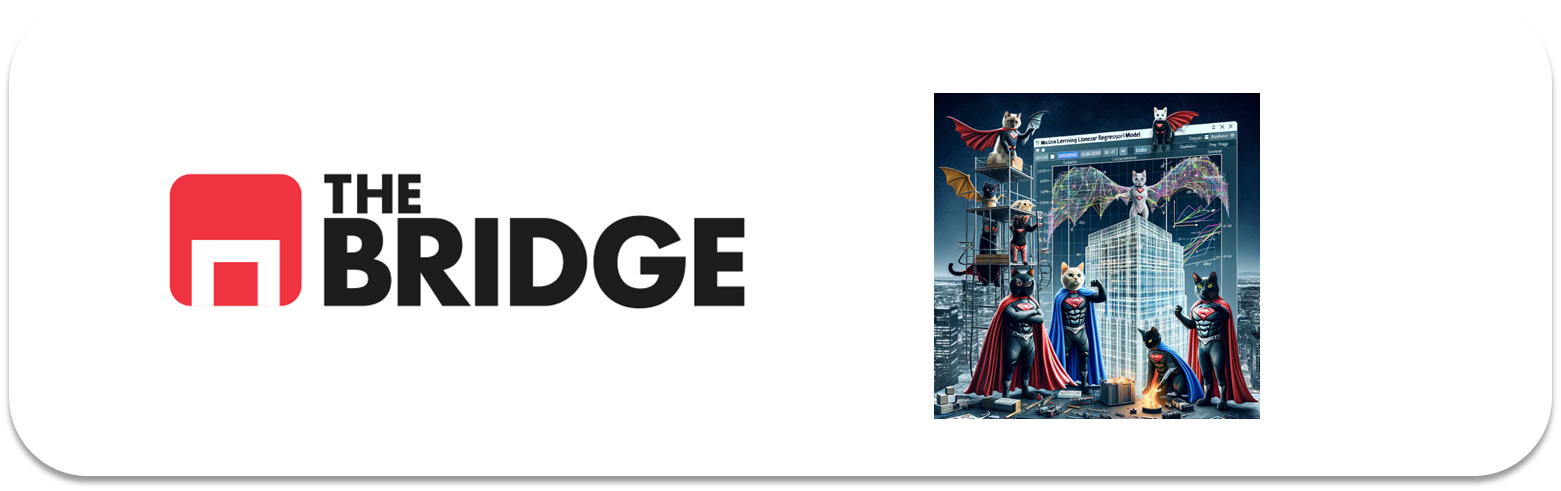

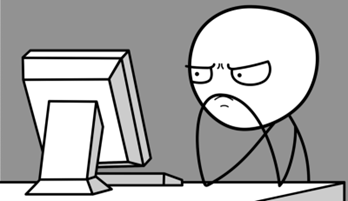

Para ejercitarte y afianzar lo aprendido sobre **Regresión Logística para clasificación binaria**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Inicio: Entendiendo el problema

En este caso el objetivo de los ejercicios es hacer un modelado de regresión logística sobre el dataset conocidos como "Adults" o "Census Income" que permita casificar a las personas en si ganan más de 50K dolalres o no, en función de una serie de características demográficas y de empleo. Sigue las instrucciones cuando sea necesario para poder continuar

El nombre de las columnas y sus valores se muestra a continuación (las columnas siguen el mismo orden que en el fichero, por si tuvieras que utilizar estos nombres)

age: edad, continuous.  

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.  

fnlwgt: continuous (a eliminar)  

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.  

education-num: continuous.  

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.  

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.  

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.  

sex: Female, Male.  

capital-gain: continuous.  

capital-loss: continuous.  

hours-per-week: continuous.  

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.  


### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score, confusion_matrix

### Ejercicio 1: Carga de datos y vistazo


Carga el conjunto de datos de TRAIN ("./data/adult.data") en un dataframe (tendrás que explorar el tipo de archivo y darle nombre a las columnas). Muestra la descripción de los datos y las primeras filas del conjunto de datos.

*Cargamos los datos, que es un poco tricky*

In [45]:


# Aunque la extensión no es csv los datos tienen ese formato (así vamos recordando cosas del pasado): 
# es un archvivo de texto separado por comas. Como no tiene cabecera, se lo expresamos así

adult_df = pd.read_csv('./data/adult.data', header=None)

# Nombres de las columnas, según la descripción del conjunto de datos
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
                'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
                'hours_per_week', 'native_country', 'income']

adult_df.columns = column_names


*Hacemos el info y el head*

In [46]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [47]:
adult_df.head(10)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


### Ejercicio 2: Preparación y limpieza de Datos (I)

En una situación normal tendríamos que revisar el dataset para ver qué podemos limpiar (convertir tipos, cambiar valores raros, etc) y sólo no deberíamos imputar faltantes sobre el dataset global. Aquí te dirigiré los pasos:

1. Quita los espacios iniciales y finales de todos los valores string del dataset.
2. Comprueba que 'workclass', 'occupation', 'native_country' contienen un valor "raro", que indica los faltantes (este es un ejemplo de dataset con "missing" que no están marcados por np.NaN)
3. Deshazte de las columna "fnlwgt" que ni se entiende, ni se necesita y deshazte de las filas con esos faltantes (tenemos muchos datos y poco "tiempo").

*1*

*Va siendo hora de desempolvar nuestros conocimientos de pandas y aplicar los métodos de string de pandas, otra vez, que ya lo hicimos en varios ejercicios*  
*IMPORTANTE: Mientras no analicemos valores, ni los cambiemos por valores que salgan de agregar otros o en función de agregaciones de otros, podemos manipular el dataset original. PERO además en este caso podríamos hacer cualquier cosa porque es el dataset de TRAIN, tal y como lo especifíca en el enunciado del ejercicio 1*

In [48]:
# Metodo manual
# del info() vemos las columnas que son tipo "object"
col_str = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']
for col in col_str:
    adult_df[col] = adult_df[col].str.strip()

In [49]:
# Método sofisticado (observa que usamos el método select_dtypes para quedarnos solo con las columnas tipo "object")
col_str = adult_df.select_dtypes(include = "object").columns.to_list()
for col in col_str:
    adult_df[col] = adult_df[col].str.strip()


*2*

*Veamos esos valores que nos dicen que pueden ser raros*

In [50]:
col_raros = ['workclass', 'occupation', 'native_country']

for col in col_raros:
    print(f"Para {col}")
    print("\n".join(adult_df[col].unique()))
    print("\n\n")


Para workclass
State-gov
Self-emp-not-inc
Private
Federal-gov
Local-gov
?
Self-emp-inc
Without-pay
Never-worked



Para occupation
Adm-clerical
Exec-managerial
Handlers-cleaners
Prof-specialty
Other-service
Sales
Craft-repair
Transport-moving
Farming-fishing
Machine-op-inspct
Tech-support
?
Protective-serv
Armed-Forces
Priv-house-serv



Para native_country
United-States
Cuba
Jamaica
India
?
Mexico
South
Puerto-Rico
Honduras
England
Canada
Germany
Iran
Philippines
Italy
Poland
Columbia
Cambodia
Thailand
Ecuador
Laos
Taiwan
Haiti
Portugal
Dominican-Republic
El-Salvador
France
Guatemala
China
Japan
Yugoslavia
Peru
Outlying-US(Guam-USVI-etc)
Scotland
Trinadad&Tobago
Greece
Nicaragua
Vietnam
Hong
Ireland
Hungary
Holand-Netherlands





*Hay un "?" que parece que no casa con el resto de valores, es nuestra forma de indicar "missing" o "faltante" o "desconocido"*

*3*

*Primero de fnlwgt*

In [51]:
adult_df.drop("fnlwgt", axis = 1, inplace = True)

In [52]:
# Forma 1, larga:
son_raros = None
for i,col in enumerate(col_raros):
    subcondicion = adult_df[col] == "?"
    if i == 0:
        condicion = subcondicion
    else:
        condicion = condicion | subcondicion # Importante son las filas que cumplen tener uno de los posibles valores raros por eso el "or" de Series -> "|""

print(len(adult_df[condicion]))
adult_df = adult_df.loc[condicion == False].copy()

2399


In [53]:
# Forma 2, corta
adult_df = adult_df.replace('?', np.NaN).dropna()

In [54]:
adult_df.native_country.value_counts()

native_country
United-States                 27504
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
India                           100
El-Salvador                     100
Cuba                             92
England                          86
Jamaica                          80
South                            71
China                            68
Italy                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Poland                           56
Columbia                         56
Iran                             42
Taiwan                           42
Haiti                            42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
France       

### Ejercicio 3: Preparación y limpieza de Datos (II)

Muestra el reparto de valores de "native-country". Convierte la variable en una binara con 1 para ciudadanos norteamericanos y 0 para el resto.

NOTA: En otras ocasiones lo hubieramos tratados por continentes por ejemplo, pero de primeras la diferencia de distribución es tan alta que es mejor simplificar que no quedarse con todos los valores

In [55]:
# Opción 1: Con lo que hemos visto
adult_df["native_country_bin"] = adult_df["native_country"].str.replace("United-States","1")
adult_df.loc[adult_df["native_country_bin"] != "1", "native_country_bin"] = "0"
adult_df["native_country_bin"] = adult_df["native_country_bin"].astype("int")
adult_df.drop("native_country", axis = 1)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income,native_country_bin
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K,1
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K,1
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K,1
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K,1
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,<=50K,1
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,>50K,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,<=50K,1
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,<=50K,1


In [56]:
adult_df["native_country_bin"].value_counts()

native_country_bin
1    27504
0     2658
Name: count, dtype: int64

### Ejercicio 4: Preparación y limpieza de Datos (III)

Escoge la variable target, ¿qué particularidad tiene?¿qué debemos hacer con ella? Hazlo.

*Observemos los valores que puede tener*

In [57]:
adult_df["income"].value_counts()

income
<=50K    22654
>50K      7508
Name: count, dtype: int64

*Es categórica pura (con etiquetas), como ya esperábamos del ejercicio anterior y por el hecho de que nos dicen desde el principio que es un problema de clasificación. Tendremos que convertirla a un numero, podemos hacer un ordinal enconding a mano o a máquina, el que prefieras*

In [58]:
adult_df["income"] = adult_df['income'].str.replace(">50K","1").replace("<=50K","0").astype(int)

<Axes: xlabel='income', ylabel='count'>

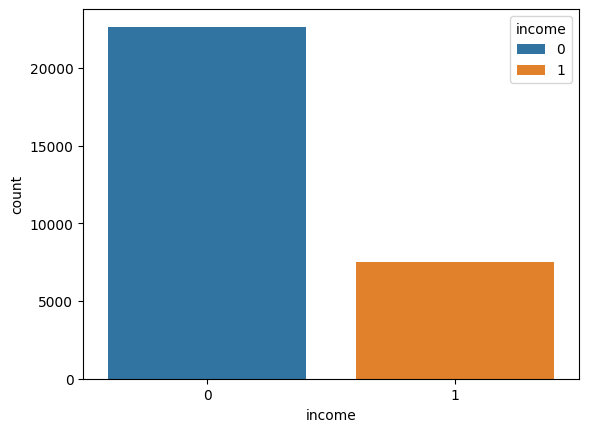

In [59]:
sns.countplot(x= "income", data = adult_df, hue = "income")

In [60]:
adult_df["income"].value_counts(normalize = True)

income
0    0.751078
1    0.248922
Name: proportion, dtype: float64

*Es un dataset desbalanceado, lo cual nos afectará para elegir la métrica y además deberíamos tratarlo de alguna forma como veremos en unidades posteriores*

### Ejercicio 5: Preparar variables categóricas (I)

Prepara las variables categóricas, salvo "education" y "native_country" (o su equivalente si no la has llamado así al connvertirla en binaria), convirtiéndolas con un one-hot encoding (usa el pd.get_dummies). NOTA: Recuerda que este es el dataset de train, por eso lo atacamos directamente.

In [61]:
# Cuidado,solo debemos incluir las CATEGORICAS del dataset, y NO DEBEMOS INCLUIR EL TARGET
adult_df = pd.get_dummies(adult_df, columns = [col for col in col_str if col != "education" and col  != "income"], dtype= "int") 

In [62]:
adult_df

,age,education,education_num,capital_gain,capital_loss,hours_per_week,income,native_country_bin,workclass_Federal-gov,workclass_Local-gov,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,39,Bachelors,13,2174,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,Bachelors,13,0,0,13,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,HS-grad,9,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,11th,7,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,Bachelors,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Assoc-acdm,12,0,0,38,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,HS-grad,9,0,0,40,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,HS-grad,9,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,22,HS-grad,9,0,0,20,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


### Ejercicio 6: Preparar variables categóricas (II)

Codifica la variable "education" usando un ordinal encoding, no uses la codificación por defecto, elígela tú y razónala o bien demuestra pillería y que has revisado el dataset.

*Este es el orden teniendo en cuenta el grado de escolarización:o sea a lo bruto*

    Preschool
    1st-4th
    5th-6th
    7th-8th
    9th
    10th
    11th
    12th
    HS-grad (Graduado de Educación Secundaria)
    Some-college (Alguna educación universitaria, sin título)
    Assoc-voc (Título asociado - educación vocacional)
    Assoc-acdm (Título asociado - académico)
    Bachelors (Licenciatura o título universitario)
    Masters (Maestría)
    Prof-school (Escuela profesional, educación después de la licenciatura, como derecho o medicina)
    Doctorate (Doctorado)



In [63]:
categories = [[
    "Preschool",
    "1st-4th",
    "5th-6th",
    "7th-8th",
    "9th",
    "10th",
    "11th",
    "12th",
    "HS-grad",
    "Some-college",
    "Assoc-voc",
    "Assoc-acdm",
    "Bachelors",
    "Masters",
    "Prof-school",
    "Doctorate"
]]


In [64]:
coder = OrdinalEncoder(categories= categories)
adult_df["education"] = coder.fit_transform(adult_df[["education"]],coder)

In [65]:
adult_df["education"].value_counts()

education
8.0     9840
9.0     6678
12.0    5044
13.0    1627
10.0    1307
6.0     1048
11.0    1008
5.0      820
3.0      557
14.0     542
4.0      455
7.0      377
15.0     375
2.0      288
1.0      151
0.0       45
Name: count, dtype: int64

*Otra posibilidad es directamente deshacernos de "education" y quedarnos con eduaction_num*

In [66]:
adult_df.drop("education", axis = 1, inplace = True)

NOTA: En un ejercicio completo deberíamos decidir si escalar las variables numéricas contínuas, si quieres puedes hacero tú como extra y comparar con el modelo que vamos a completar en este conjunto de ejercicios.

### Ejercicio 7: Modelo (I)

Instancia el modelo de regresión logística, con el hiperparámetro "max_iter" a 10000.

In [67]:
log_class = LogisticRegression(max_iter = 10000)

### Ejercicio 8: Entrenamiento

Entrena modelo para el dataset de train tal como lo hemos preparado, creando antes el dataset sólo de features (X_train) y la serie con los valores del target (y_train). NOTA: Deshazte de "education_num" si has codificado tú a mano "education".

In [68]:
X_train = adult_df.drop("income", axis = 1)
y_train = adult_df["income"]


In [69]:

log_class.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

### Ejercicio 9: Evaluación (I)

Previo a la evaluación necesitamos obtener y preparar el dataset de test. Carga el dataset a partir de "./data/adult.test". Luego aplícale las mismas operaciones que has realizado sobre el train. (NOTA; Puede que tengas que cambiar alguna cosa en la variable "income" para convertirla)

In [70]:
adult_test_df = pd.read_csv("./data/adult.test", header = None)
adult_test_df.columns = column_names
col_str = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']
for col in col_str:
    print(col)
    adult_test_df[col] = adult_test_df[col].str.strip()
adult_test_df.drop("fnlwgt", axis = 1, inplace = True)
son_raros = None
for i,col in enumerate(col_raros):
    subcondicion = adult_test_df[col] == "?"
    if i == 0:
        condicion = subcondicion
    else:
        condicion = condicion | subcondicion # Importante son las filas que cumplen tener uno de los posibles valores raros por eso el "or" de Series -> "|""

print(len(adult_test_df[condicion]))
adult_test_df = adult_test_df.loc[condicion == False].copy()
adult_test_df["native_country_bin"] = adult_test_df["native_country"].str.replace("United-States","1")
adult_test_df.loc[adult_test_df["native_country_bin"] != "1", "native_country_bin"] = "0"
adult_test_df["native_country_bin"] = adult_test_df["native_country_bin"].astype("int")
adult_test_df.drop("native_country", axis = 1, inplace = True)
col_str.remove("native_country")
adult_test_df["income"] = adult_test_df['income'].str.replace(">50K.","1").replace("<=50K","0").replace("<=50K.","0").astype(int)
adult_test_df.drop("education", axis = 1, inplace = True)
adult_test_df = pd.get_dummies(adult_test_df, columns = [col for col in col_str if col != "education" and col  != "income"], dtype= "int") 
X_test = adult_test_df.drop("income", axis = 1)
y_test = adult_test_df["income"]

workclass
education
marital_status
occupation
relationship
race
sex
native_country
income
1221


### Ejercicio 10: Evaluación (II)

Obten la predicción para X_train y para X_test.

In [71]:
pred_train = log_class.predict(X_train)
pred_test = log_class.predict(X_train)

### Ejercicio 11: Evaluación (III)

Muestra la matriz de confusión para los resultados de train, así como el clasification_report de sklearn

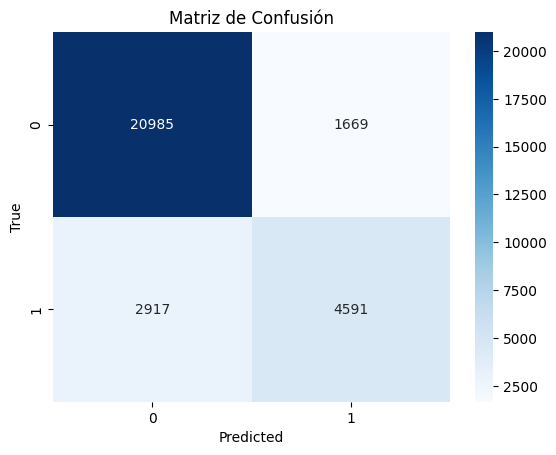

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     22654
           1       0.73      0.61      0.67      7508

    accuracy                           0.85     30162
   macro avg       0.81      0.77      0.78     30162
weighted avg       0.84      0.85      0.84     30162



In [72]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_train, pred_train)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Generar el informe de clasificación
print(classification_report(y_train, pred_train))

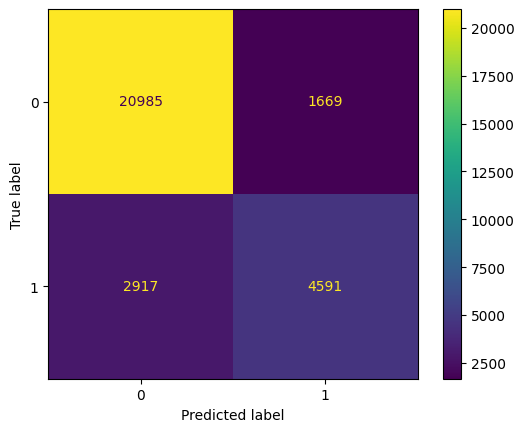

In [73]:
# Empleando las capacidades nativas de Sklearn

ConfusionMatrixDisplay.from_predictions(y_train, pred_train);

### Ejercicio 12: Evaluación (IV)
Muestra la matriz de confusión y el classification report para los resultados del test. Comparála con los de train.

In [74]:
# Calcular la matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, pred_test);

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Generar el informe de clasificación
print(classification_report(y_test, pred_test))

ValueError: Found input variables with inconsistent numbers of samples: [15060, 30162]

*El modelo, como era de esperar, detecta mejor la clase 0 (muy superior a la 1 en proporcion) pero muestra buenos números para la clase 1. Además la generalización es casi perfecta. Podriamos decir que tenemos un modelo muy bueno*

### Extra: 

1. Muestra la curva ROC de test.

2. Muestra los coeficientes y su importancia.

In [75]:
### Usando matplotlib
from sklearn.metrics import roc_curve, auc
scores = log_class.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, scores[:,1])
roc_auc = auc(fpr,tpr)
print("AUROC: %.2f" %(roc_auc))
plt.figure(figsize=(6, 5))  
plt.plot(fpr, tpr, linewidth=2, color= "blue", label=f"ROC Logistic Reg (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- native_country_Cambodia
- native_country_Canada
- native_country_China
- native_country_Columbia
- native_country_Cuba
- ...


*Como era de esperar el modelo presenta un magnífico AuROC = 0.9 y una figura ROC de las que no verás muchas*

In [76]:
def show_coefs(model, figsize=(10, 5)):
    df_coef = pd.DataFrame(model.coef_[0], index=model.feature_names_in_, columns=["coefs"])

    fig, ax = plt.subplots(1, 2, figsize=figsize)
    df_coef.plot(kind="barh", ax=ax[0], legend=False)
    df_coef.abs().sort_values(by="coefs").plot(kind="barh", ax=ax[1], legend=False)
    fig.suptitle("Model Coefficients")

    fig.tight_layout()

    return df_coef

,coefs
age,0.024056
education_num,0.282399
capital_gain,0.000316
capital_loss,0.000638
hours_per_week,0.028788
...,...
native_country_Thailand,-0.034796
native_country_Trinadad&Tobago,-0.036772
native_country_United-States,0.019365
native_country_Vietnam,-0.158846


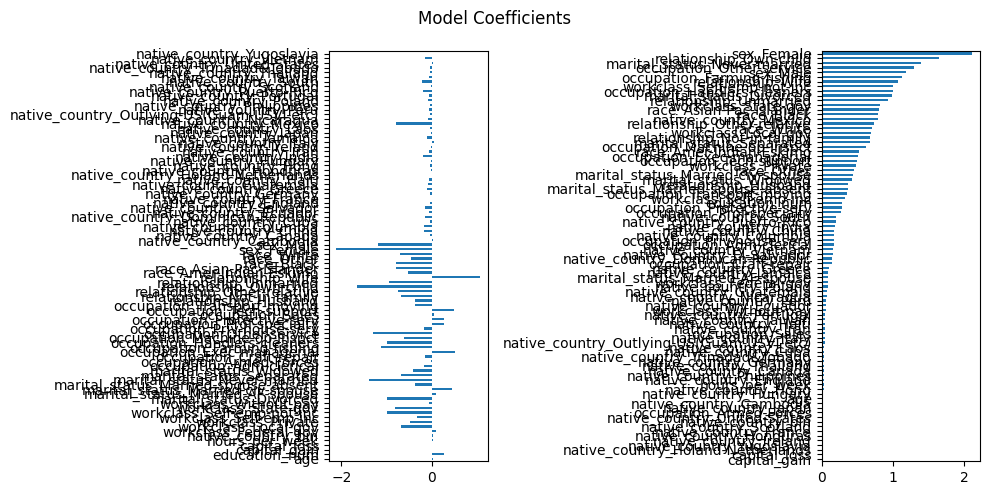

In [77]:
show_coefs(log_class)